<a href="https://colab.research.google.com/github/chillMLguy/ML24-25L/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generowanie danych

In [8]:
import numpy as np

#Korzystam z danych z zajęć
np.random.seed(42)


mean1, cov1 = np.array([0.0, 0.0]), np.array([[0.16, 0.0], [0.0, 0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

mean2, cov2 = np.array([0.8, 0.8]), np.array([[0.04, 0.0], [0.0, 0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3, cov3 = np.array([-0.8, 0.8]), np.array([[0.04, 0.0], [0.0, 0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

data_X = np.vstack([data1, data2, data3])


2.Model z granicą decyzyjną

<ipython-input-9-c9de108d26d8>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


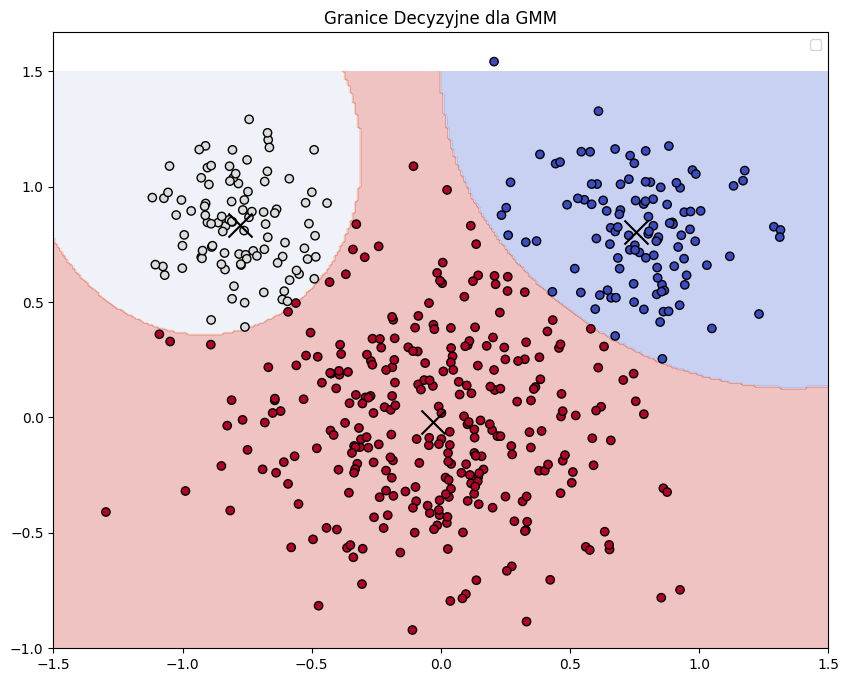

In [9]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


# Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data_X)

# Siatka punktów na R^2
x, y = np.meshgrid(np.linspace(-1.5, 1.5, 300), np.linspace(-1, 1.5, 300))
xy = np.column_stack([x.ravel(), y.ravel()])

# Przewidywanie dla siatki
pred = gmm.predict_proba(xy)
predicted_clusters = np.argmax(pred, axis=1)

Z = predicted_clusters.reshape(x.shape)

# Wykres
plt.figure(figsize=(10, 8))
plt.contourf(x, y, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), cmap='coolwarm', edgecolors='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='black', marker='x', s = 300)
plt.title("Granice Decyzyjne dla GMM")
plt.legend()
plt.show()

Wizualizacja granic decyzyjnych wygląda zadowalająco. Jedyne nierregularności mogą pojawić się dla punktów na granicy, które intuicyjnie powinny należeć do innego klastra. Wynikają one z faktu, że mamy do czynienia z prawdopodobieństwem, że w danym miejscu punkt należy do klastra, a nie z twardym podziałem.

3.Wybieranie optymalnego K

In [10]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


K = range(2, 10)
silhouette_scores_gmm = []
silhouette_scores_kmeans = []
silhouette_scores_kmedoids = []

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels_gmm = gmm.fit_predict(data_X)
    silhouette_scores_gmm.append(silhouette_score(data_X, labels_gmm))


    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(data_X)
    silhouette_scores_kmeans.append(silhouette_score(data_X, labels_kmeans))

    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam')
    labels_kmedoids = kmedoids.fit_predict(data_X)
    silhouette_scores_kmedoids.append(silhouette_score(data_X, labels_kmedoids))


plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores_gmm, marker='o', linestyle='-', color='red')
plt.xlabel("Liczba klastrów (K)")
plt.ylabel("Wskaźnik Sylwetki")
plt.grid()
plt.show()



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject